In [21]:
%load_ext autoreload
%autoreload 2
from ga.numba_ga import GaHMM
from data.digits import DigitDataset
import hmm.bw as bw
from hmm.hmm import random_left_right_hmm_params
import seaborn as sns

import ga.crossover as crossover
import ga.mutation as mutation
import ga.selection as selection
import numpy
from hmm.hmm import multiple_observation_sequences_from_ndarray_list

from data.faces import FacesDataset
from data.data import Observations
import numpy.random as npr
from ga.selection import _selection

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


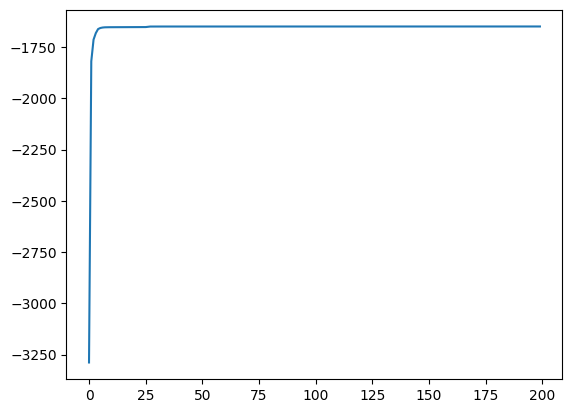

In [20]:
n_symbols = 256
n_states = 5
N_BW_ITERATIONS = 200
POPULATION_SIZE = 30
N_GENERATIONS=20000

dataset = Observations(dataset='fsdd', n_symbols=n_symbols)

def roulette_wheel_selection(population, n_parents, gabw: GaHMM):
    log_fitness_values = population[:, gabw.slices.fitness]
    fitness_values = numpy.exp(log_fitness_values)

    total_fitness = numpy.sum(fitness_values)
    selection_probs = fitness_values / total_fitness

    parent_indices = npr.choice(len(population), size=n_parents, p=selection_probs)

    parents = _selection(population, n_parents, parent_indices)
    return parents

def mutation_factory(mutation_chance):

    def mutation_func(chromosome, gabw: GaHMM):
        if npr.rand() >= mutation_chance:
            return chromosome

        start, stop, _ = gabw.ranges.B
        mutate_indices = numpy.empty(3)
        mutate_indices[0:2] = npr.randint(start, stop, size=2)

        start, stop, _ = gabw.ranges.A
        mutate_indices[2] = npr.randint(start, stop)

        rand_values = npr.random(size=3)
        chromosome[mutate_indices] = rand_values
        return chromosome
    return mutation_func    

def crossover_factory(crossover_rate):

    def crossover_func(parents, n_children, gabw: GaHMM):
        



for digit in range(1):
        training_observations = dataset.get_first_n_observations_of_category(digit, n=10)
        other_observations = dataset.get_first_n_observations_except_category(digit, n=10)

        hmm_params = random_left_right_hmm_params(n_states, n_symbols)
        reestimated_hmm_params, trace = bw.train_multiple_observations(hmm_params, training_observations, n_iterations=N_BW_ITERATIONS)
        sns.lineplot(trace.T)

        # gabw = GaHMM(
        #     n_symbols,
        #     n_states,
        #     population_size=POPULATION_SIZE,
        #     n_generations=N_GENERATIONS,
        #     observations=training_observations
        # )
        # gabw.parent_select_func = 

c:\Users\imigs\Desktop\GA HMM\ga\gabw_logger.py:38: UserWarning: 
The markers list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  g = sns.scatterplot(data=self.logs.T, legend=False, markers='.')


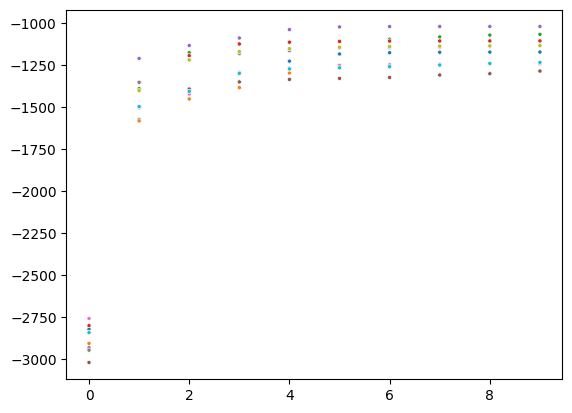

In [12]:



        # load training data
        # load testing data

# # observations = random_observations(n_observations=10, n_symbols=128, max_length=40, min_length=20)

# gabw = GaHMM(
#         n_symbols=n_symbols,
#         n_states=5,
#         population_size=10,
#         n_generations=10,
#         observations=observations)
# # gabw.fitness_func = mean_log_prob_fitness(observation_sequences)
# # gabw.mutation_func = mutation.constant_uniform_mutation_factory(mutation_threshold=0.001)
# # gabw.mutation_func = mutation.min_max_mutation_factory(0.001)
# gabw.mutation_func = mutation.exchange_withing_row_crossover_factory(mutation_threshold=0.001)
# # gabw.crossover_func = crossover.uniform_crossover
# gabw.crossover_func = crossover.n_point_crossover_factory(n_crossover_points=1)
# # gabw.crossover_func = crossover.n_point_shuffle_crossover_factory(n_crossover_points=1)
# gabw.parent_select_func = selection.rank_selection_factory(gabw.population_size)


# gabw.n_bw_iterations_before_ga = 10
# # gabw.n_bw_iterations_per_gen = 3
# # gabw.apply_bw_every_nth_generaton = 5
# # gabw.apply_bw_every_nth_generaton = 10
# gabw.n_generations = 0

# gabw.start()
# gabw.plot()

In [11]:
observations

MultipleObservationSequences(slices=array([  0,  29,  87, 153, 215, 268, 331, 394, 460, 512, 569]), arrays=array([ 61,  61,  61,  61,  61,  61,  61,  61,  61,  61,  61, 111,  19,
        19, 101,  17, 110, 110,  83,  83,  67,  52,  52,  85,  85,  27,
        27,  27,  27,  35,  35,  35,  35, 107, 107, 107,  35,  50,  50,
        50,  50,  19,  19,  70,  70, 111,  54, 111,  61,  61,  61,  57,
       111,  57,  19, 110, 110, 110, 110, 110,  83,  67,  67,  67,  52,
        85,  85,  85,  27,  27,  27,  27,   0,   0,   0,  91,  91,  91,
        91,  88,  88,  88,  30,  45,  75,  45,  88,  35,  48,  48,  48,
        48,  48,  48,  48,  50,  50,  50,  70,  48,  70,  70, 111, 111,
       111,  61, 111,  57,  61,  61, 111, 111, 111,  19,  19,  19, 110,
       110, 110, 102,  83,  67,  52,  52,  52,  85,  85,  85,  27,  27,
        27,  27,  27,   0,   0,   0,   0,   0,   0,  88,  88,  88,  88,
        88,  88,  98, 115, 115, 115, 115,  66, 115, 115,  48,  35,  48,
        48,  48,  48,  70,  7

In [ ]:
# print(gabw.population[:, gabw.slices.fitness])
gabw.n_bw_iterations_before_ga = 50
gabw.n_generations = 1000
# gabw.n_bw_iterations_per_gen = 1
# gabw.apply_bw_every_nth_generaton = 10
gabw.start()
gabw.plot()
# print(gabw.population[:, gabw.slices.fitness])

In [ ]:
gabw.population[:, -2]

In [ ]:
gabw.keep_elitism

In [ ]:
params = random_left_right_hmm_params(gabw.n_states, gabw.n_symbols)
new_params, trace = bw.train_multiple_observations(params, observations, n_iterations=100)
sns.lineplot(data=trace.T / 50)

In [ ]:
index = 5
start, stop, _ = gabw.slices.emission_probs
emission_probs = population_prior[0, start:stop]
sns.histplot(population_prior[index, start:stop], bins=200)

In [ ]:
sns.histplot(gabw.population[index, start:stop], bins=200)

In [ ]:
population_prior[1]